#### *For same output in every run*
---

In [93]:
import os
import random
import numpy as np
import tensorflow as tf

# Set all random seeds for reproducibility
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

### Download

In [94]:
import kagglehub
import os

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
csv_path = os.path.join(path, "creditcard.csv")
print("CSV file path:", csv_path)

CSV file path: /kaggle/input/creditcardfraud/creditcard.csv


#### *Import all dependencies*
---

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from collections import defaultdict

In [96]:
df = pd.read_csv(csv_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [97]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [98]:
# Good No Null Values!
df.isnull().sum().max()

0

In [99]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [100]:
round(df['Class'].value_counts()[0])


284315

In [101]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note:**  Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

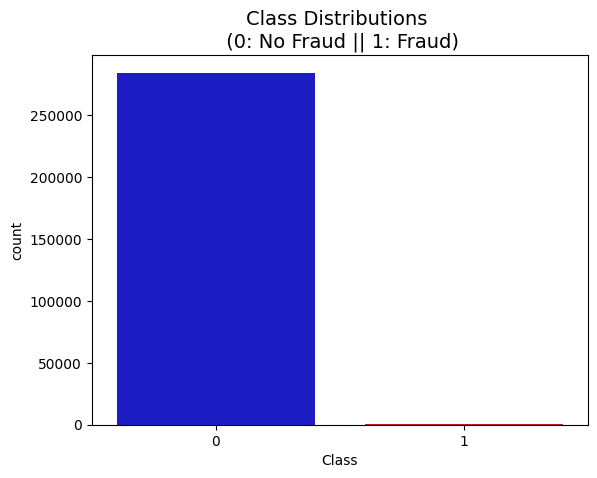

In [102]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, hue='Class', palette=colors, legend=False)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


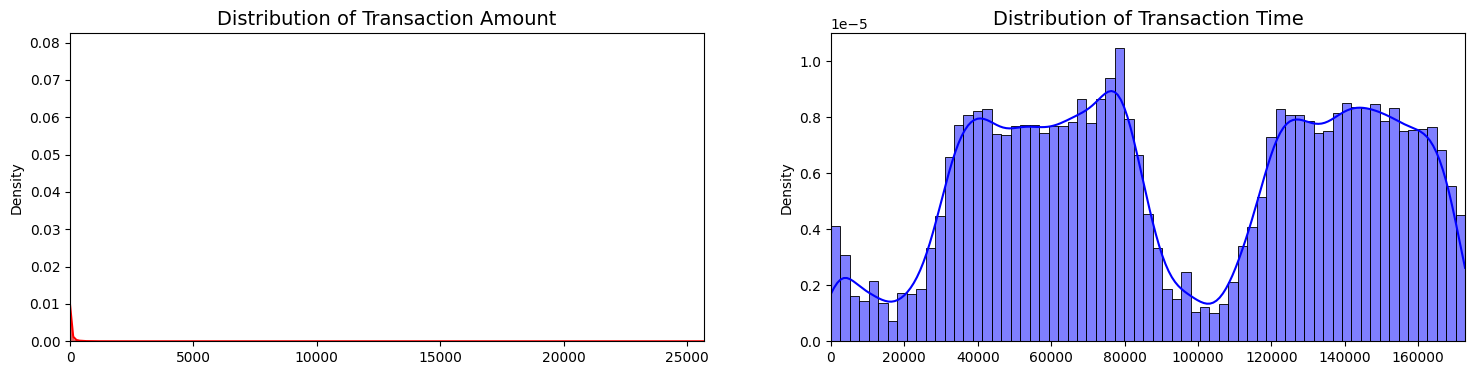

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# Updated from distplot to histplot
sns.histplot(amount_val, ax=ax[0], color='r', kde=True, stat='density')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', kde=True, stat='density')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


In [104]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [105]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Random Under-Sampling:


In this phase of the project we will implement *"Random Under Sampling"* which basically consists of removing data in order to have a more <b> balanced dataset </b> and thus avoiding our models to overfitting.

In [106]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df= df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
280412,-0.279466,0.996558,-0.300026,0.949818,0.074290,0.933936,0.996314,-0.734827,1.065931,-0.046607,...,0.004937,0.166577,0.660828,-0.253749,-0.004951,-0.059794,-0.392513,0.422035,0.234143,0
95597,18.615944,-0.226824,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,...,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1
72197,2.586460,-0.353435,0.786116,-1.067510,0.917200,0.885069,-0.987685,0.989969,-0.692766,0.296164,...,0.365800,0.141353,0.412901,-0.432923,-0.366233,0.546041,0.702749,-0.008153,0.037743,0
75511,2.080905,-0.335930,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,...,0.270459,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1
255556,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1


##  Equally Distributing and Correlating:
<a id="correlating"></a>
Now that we have our dataframe correctly balanced, we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


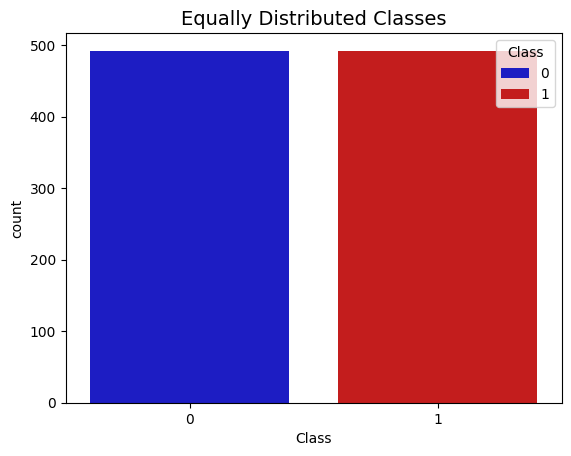

In [107]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot(x='Class',hue='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

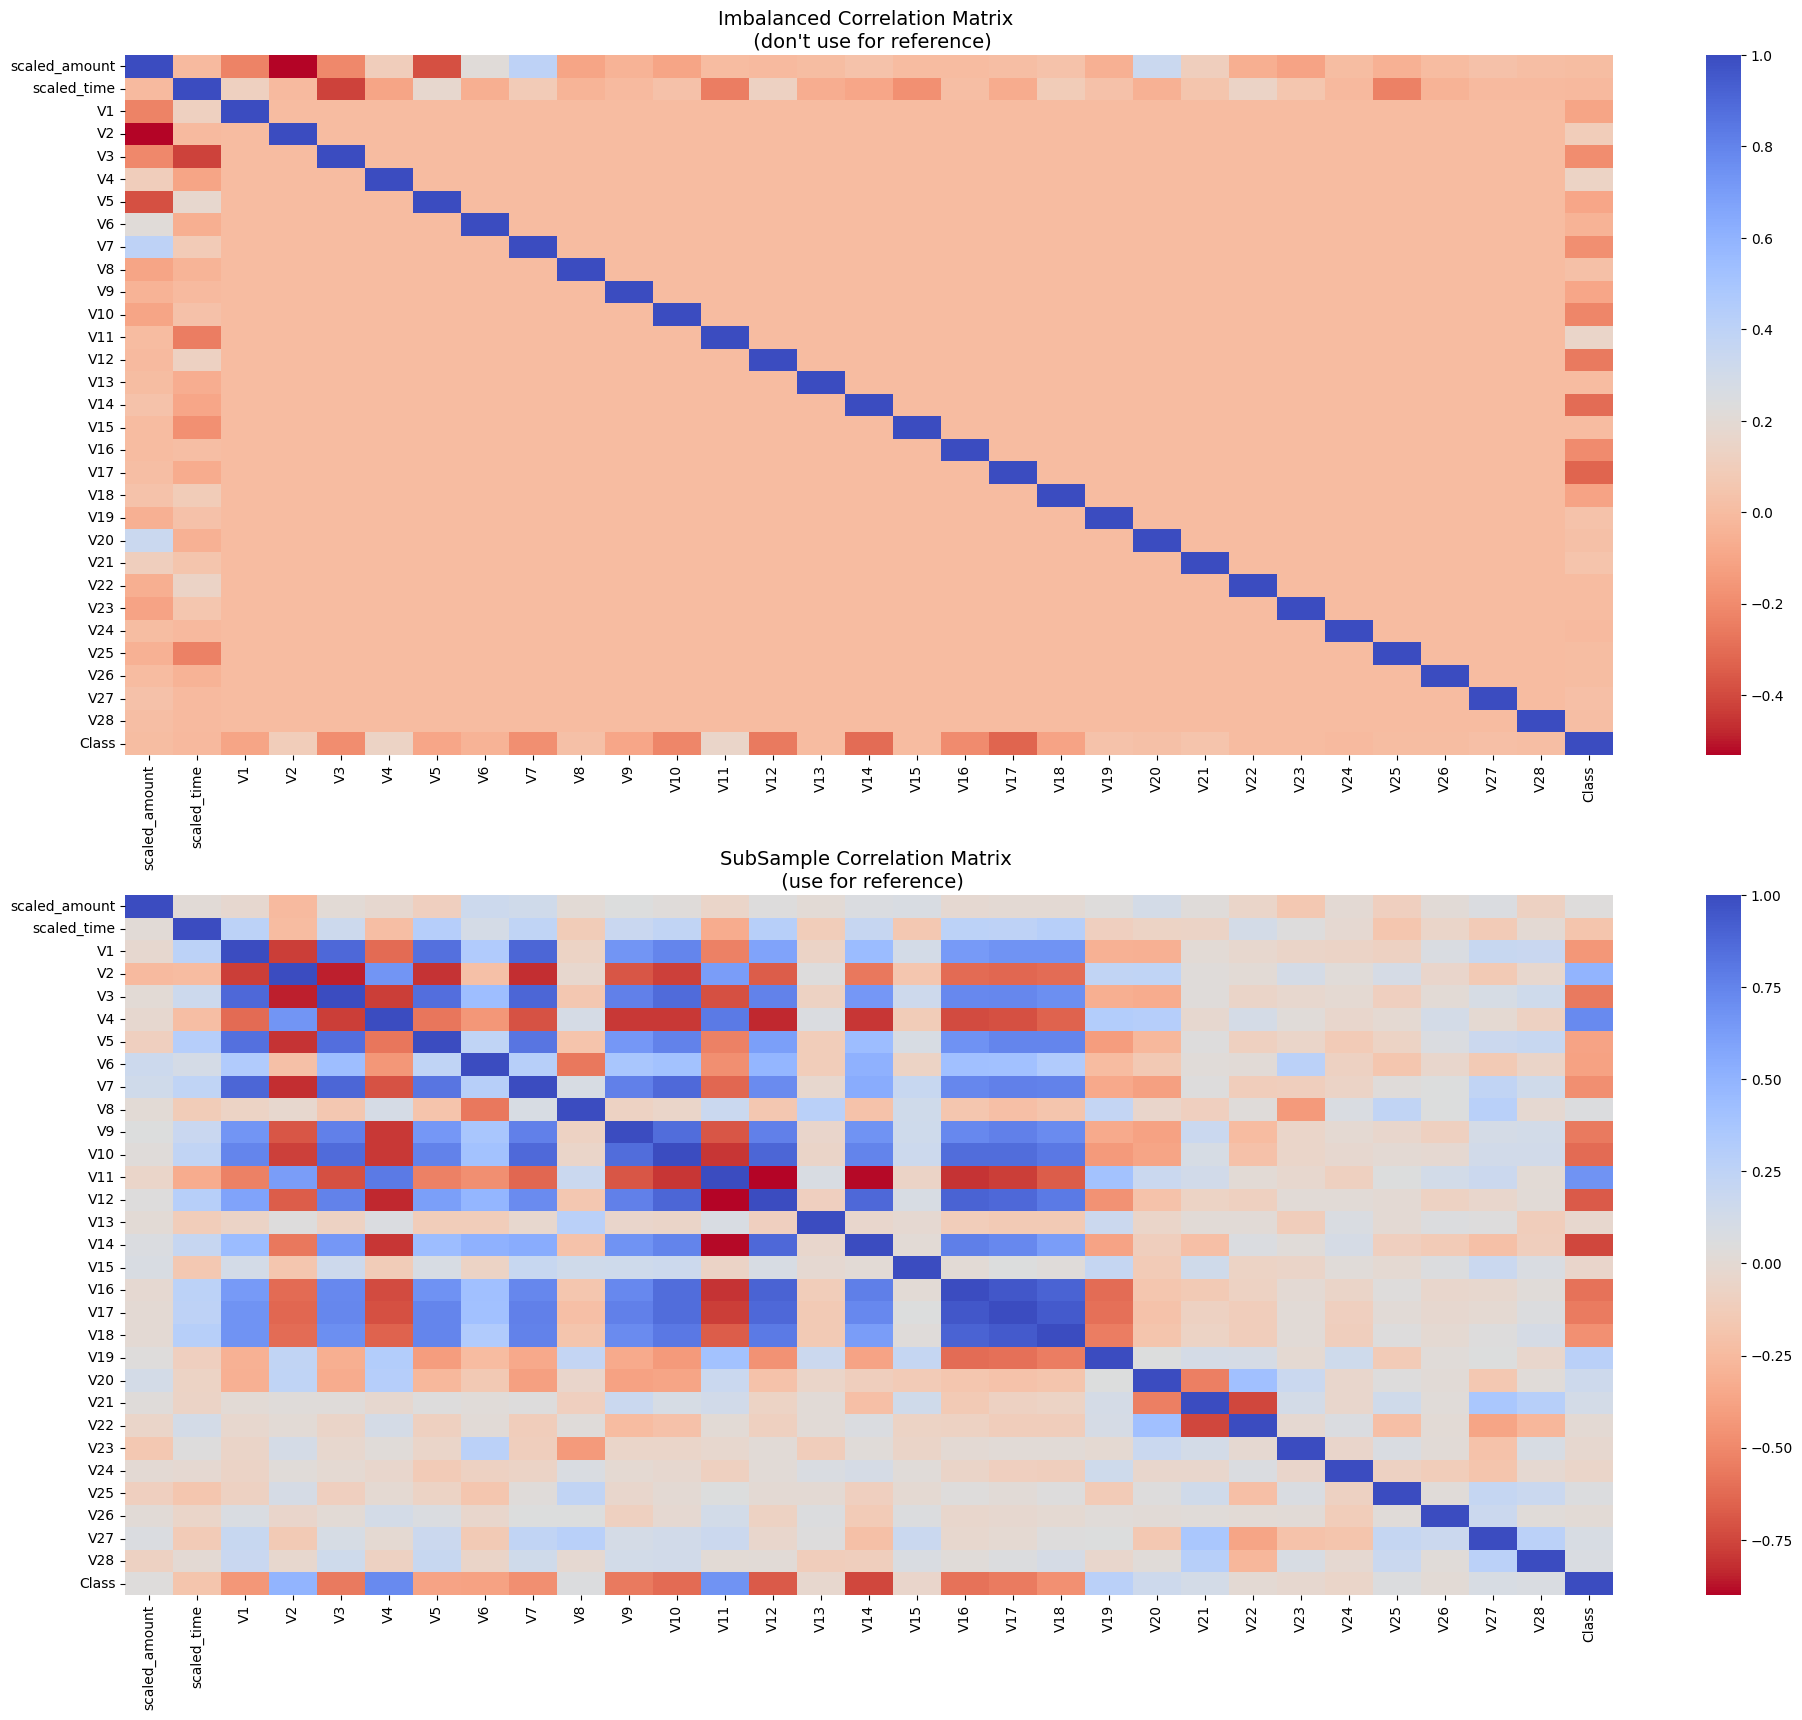

In [108]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

<h2> Classifiers (UnderSampling):  </h2>
<a id="classifiers"></a>
In this section we will train four types of classifiers and decide which classifier will be more effective in detecting <b>fraud transactions</b>.  Before we have to split our data into training and testing sets and separate the features from the labels.

## Summary:
<ul>
<li> <b> Logistic Regression </b> classifier is more accurate than the other three classifiers in most cases. (We will further analyze Logistic Regression) </li>

<li> Logistic Regression has the best Accuracy, meaning that LogisticRegression pretty accurately separates <b> fraud </b> and <b> non-fraud </b> transactions.</li>
</ul>



In [109]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [110]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [111]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [112]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [113]:
#Our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


<h2> Neural Network Classifier: </h2>
<a id="neural_network"></a>
In this section, we will train a **Neural Network** model to detect <b>fraud transactions</b>. We will evaluate the performance of the model and compare it with other classifiers like Logistic Regression, Random Forest, SVM, and KNN. Before training the neural network, we will split our data into training and testing sets, and separate the features from the labels.

### Steps:
1. **Data Preprocessing:**
   - We will preprocess the dataset by scaling the features and handling any imbalance using **undersampling** to ensure that the neural network performs optimally on the dataset.
   

   
2. **Building the Neural Network:**
   - A **feed-forward neural network** will be constructed with the following architecture:
     - **Input layer**: Corresponds to the number of features.
     - **Hidden layers**: Includes one or more layers with activation functions (e.g., ReLU) to capture complex patterns.
     - **Output layer**: A sigmoid activation function to predict binary outcomes (fraud or non-fraud).
     
3. **Training the Model:**
   - The model will be trained using the **training data**, applying an appropriate optimizer  and loss function (e.g., binary crossentropy).
   
4. **Performance Evaluation:**
   - The performance of the neural network will be evaluated on the **test data** using metrics like **accuracy**, **precision**, **recall**, and **F1-score**.
   





In [114]:
def build_and_evaluate_model(hidden_activation, optimizer, title):
    model = Sequential()
    model.add(Dense(32, activation=hidden_activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation=hidden_activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy=accuracy_score(y_test,y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"\n=== {title} ===")
    print(classification_report(y_test, y_pred))

    return history, report['1']['precision'], report['1']['recall'], report['1']['f1-score'],accuracy

In [115]:
results = []
configs = [
    ('tanh', SGD(), 'Tanh + SGD'),
    ('tanh', Adam(), 'Tanh + Adam'),
    ('tanh', RMSprop(), 'Tanh + RMSprop'),
    ('relu', SGD(), 'ReLU + SGD'),
    ('relu', Adam(), 'ReLU + Adam'),
    ('relu', RMSprop(), 'ReLU + RMSprop'),
]

for act, opt, label in configs:
    hist, precision, recall, f1 ,accuracy= build_and_evaluate_model(act, opt, label)
    results.append((label, precision, recall, f1, accuracy))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

=== Tanh + SGD ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        93
           1       0.93      0.94      0.94       104

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

=== Tanh + Adam ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        93
           1       0.97      0.93      0.95       104

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

=== Tanh + RMSprop ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        93
           1       0.96      0.93      0.95       104

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

=== ReLU + SGD ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        93
           1       0.99      0.90      0.94       104

    accuracy                           0.94       197
   macro avg       0.95      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

=== ReLU + Adam ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.98      0.93      0.96       104

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

=== ReLU + RMSprop ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.98      0.93      0.96       104

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



<h2> Plots of the model: </h2>
<a id="neural_network"></a>
We are using both the hidden layers with same activation functions.

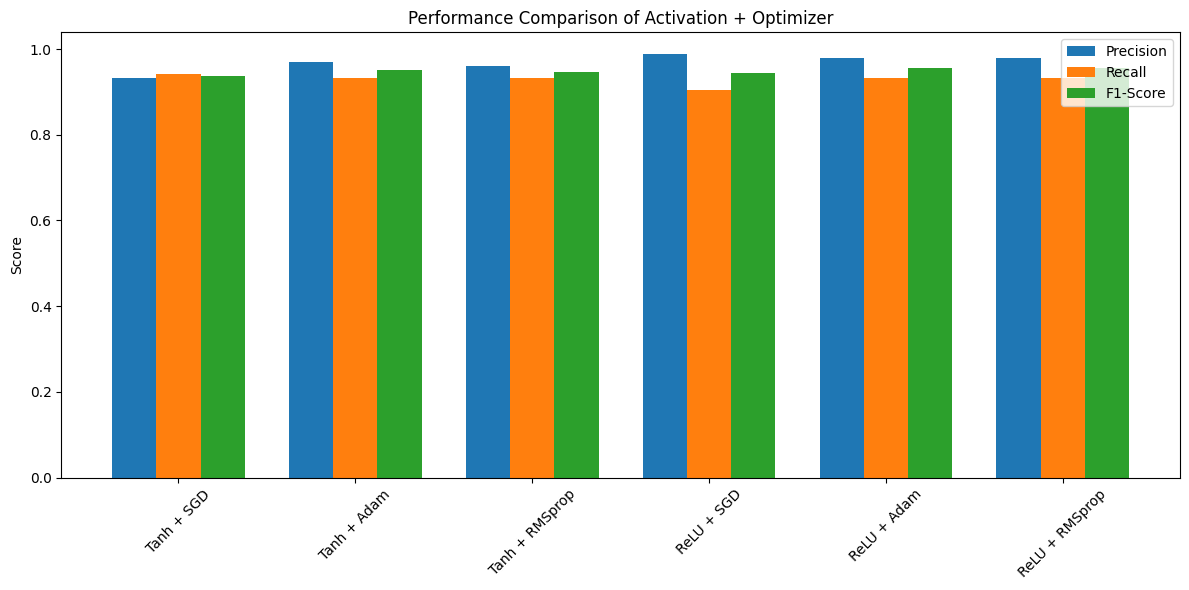

In [116]:
labels = [x[0] for x in results]
precisions = [x[1] for x in results]
recalls = [x[2] for x in results]
f1_scores = [x[3] for x in results]
accuracies= [x[4] for x in results]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precisions, width, label='Precision')
plt.bar(x, recalls, width, label='Recall')
plt.bar(x + width, f1_scores, width, label='F1-Score')
plt.xticks(x, labels, rotation=45)
plt.ylabel("Score")
plt.title("Performance Comparison of Activation + Optimizer")
plt.legend()
plt.tight_layout()
plt.show()

In [117]:
activations = ['tanh', 'relu']
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop()
}

# Accuracy Plot

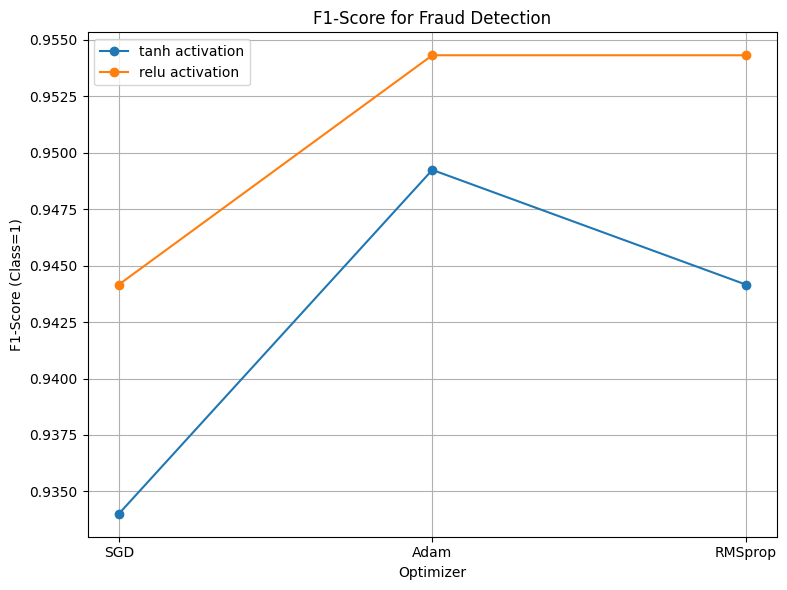

In [118]:
plt.figure(figsize=(8, 6))

plt.plot(optimizers.keys(),accuracies[:3], marker='o', label='tanh activation')
plt.plot(optimizers.keys(),accuracies[3:], marker='o', label='relu activation')

plt.title("F1-Score for Fraud Detection")
plt.xlabel("Optimizer")
plt.ylabel("F1-Score (Class=1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2> Plots of the model: </h2>
<a id="neural_network"></a>
We are using both the hidden layers with different activation function.

In [119]:
def build_and_evaluate_model2(hidden_activation1,hidden_activation2, optimizer, title):
    model = Sequential()
    model.add(Dense(32, activation=hidden_activation1, input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation=hidden_activation2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy=accuracy_score(y_test,y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"\n=== {title} ===")
    print(classification_report(y_test, y_pred))

    return history, report['1']['precision'], report['1']['recall'], report['1']['f1-score'],accuracy

In [120]:
results2 = []
configs = [
    ('tanh','relu', SGD(), 'Tanh,ReLU + SGD'),
    ('tanh','relu', Adam(), 'Tanh,ReLU + Adam'),
    ('tanh','relu', RMSprop(), 'Tanh,ReLU + RMSprop'),
    ('relu','tanh', SGD(), 'ReLU,Tanh + SGD'),
    ('relu','tanh', Adam(), 'ReLU,Tanh + Adam'),
    ('relu','tanh', RMSprop(), 'ReLU,Tanh + RMSprop'),
]

for act1, act2, opt, label in configs:
    hist, precision, recall, f1 ,accuracy= build_and_evaluate_model2(act1, act2, opt, label)
    results2.append((label, precision, recall, f1, accuracy))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

=== Tanh,ReLU + SGD ===
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        93
           1       0.99      0.91      0.95       104

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

=== Tanh,ReLU + Adam ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.98      0.93      0.96       104

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

=== Tanh,ReLU + RMSprop ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        93
           1       0.97      0.93      0.95       104

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

=== ReLU,Tanh + SGD ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        93
           1       1.00      0.88      0.94       104

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

=== ReLU,Tanh + Adam ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.98      0.93      0.96       104

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

=== ReLU,Tanh + RMSprop ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.98      0.93      0.96       104

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



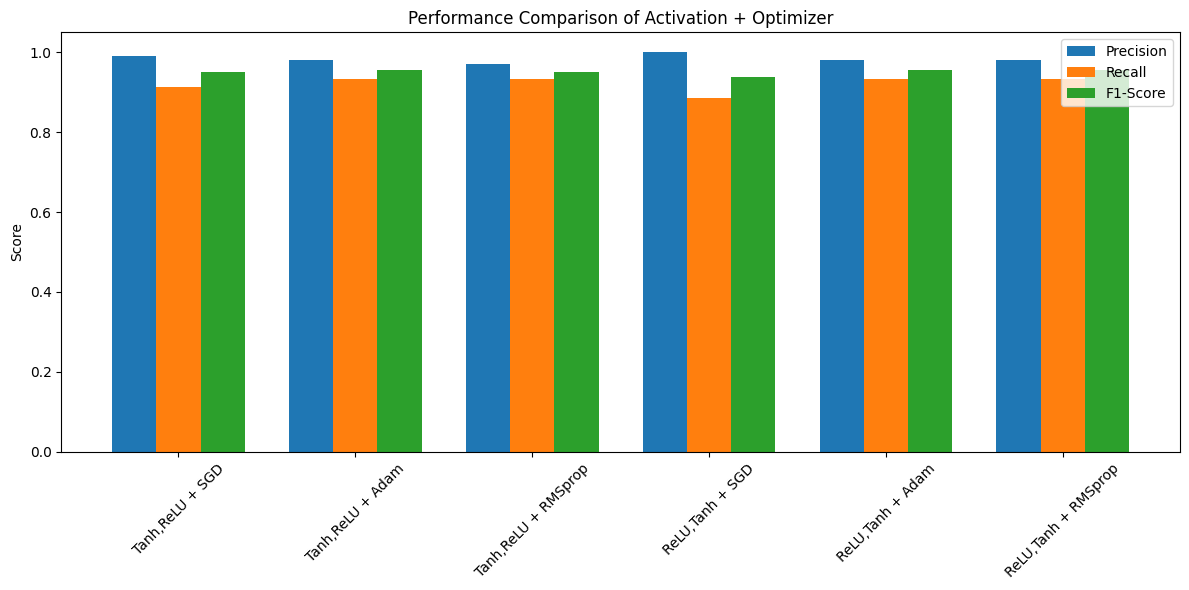

In [121]:
labels = [x[0] for x in results2]
precisions = [x[1] for x in results2]
recalls = [x[2] for x in results2]
f1_scores = [x[3] for x in results2]
accuracies= [x[4] for x in results2]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precisions, width, label='Precision')
plt.bar(x, recalls, width, label='Recall')
plt.bar(x + width, f1_scores, width, label='F1-Score')
plt.xticks(x, labels, rotation=45)
plt.ylabel("Score")
plt.title("Performance Comparison of Activation + Optimizer")
plt.legend()
plt.tight_layout()
plt.show()

# Accuracy Plot

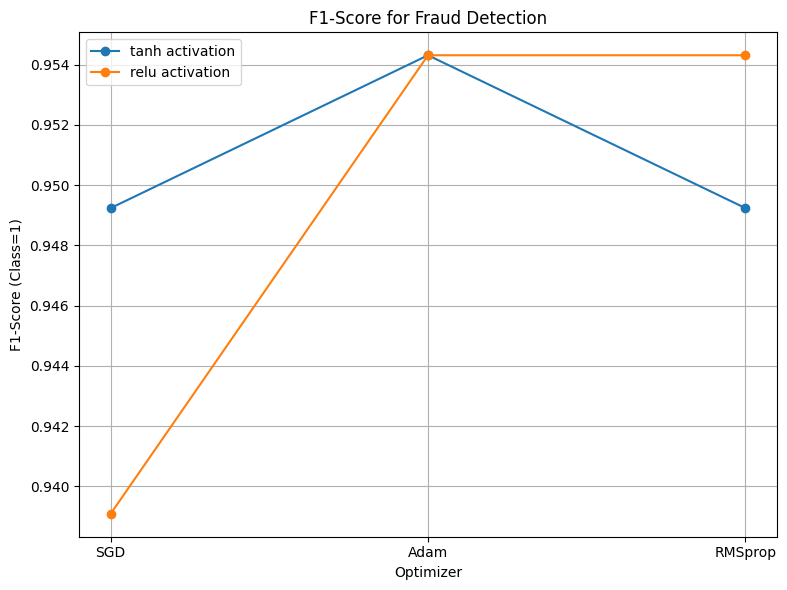

In [122]:
plt.figure(figsize=(8, 6))

plt.plot(optimizers.keys(),accuracies[:3], marker='o', label='tanh activation')
plt.plot(optimizers.keys(),accuracies[3:], marker='o', label='relu activation')

plt.title("F1-Score for Fraud Detection")
plt.xlabel("Optimizer")
plt.ylabel("F1-Score (Class=1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Find Fraud or not Fraud

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

def find_fraud(hidden_activation1, hidden_activation2, optimizer, new_transaction):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Explicit input layer
        Dense(32, activation=hidden_activation1),
        Dense(16, activation=hidden_activation2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2)

    # Predict on new transaction
    fraud_prob = model.predict(new_transaction)

    is_fraud = "Fraud(1)" if fraud_prob[0][0] > 0.5 else "Not Fraud(0)"

    print("Fraud Probability:", fraud_prob[0][0])
    print("Is Fraud?", is_fraud)


# Fraud examples

In [124]:
fraud1=np.array([4.042199399147628,-0.12253433428494226,-2.25053480921229,2.36575487772312,-2.95549117924385,0.0897905975142065,-2.83074456678034,-0.844461639207772,-0.174061560679368,-0.407138137833787,0.174216293591102,-2.9989262562074,2.60516857519668,-3.67771661422902,-0.961254636207547,-4.62948099682303,1.94218161282,-4.18037888438458,-4.60568646763486,-2.55718413666009,1.58958220191211,-0.48653714178381,0.256559618287662,-0.466245243122949,0.291104927494009,0.242566552797207,-1.27909371150404,-1.12353433717278,-0.630976512544474,0.326839204012689])
fraud2=np.array([-0.23754628659260812,-0.3266603226071735,-0.0754834663888726,1.81235458422751,-2.56698081016962,4.12754860722303,-1.62853157024518,-0.805895445766318,-3.39013454458215,1.01935326231828,-2.45125125188341,-3.55583492739064,4.31571103012142,-5.47980167679906,-2.11550315600957,-5.5887855765974,0.280108069299552,-3.50723062361012,-7.45709493793125,-2.32549168188332,-0.440434552920779,0.338598140549314,0.794372451897782,0.270471232297866,-0.143624140755259,0.0135659145316466,0.634203128800614,0.213693187250942,0.773625466697089,0.387434054572014])
fraud3=np.array([4.781527282889681,-0.5073720320962417,-16.5265065691231,8.58497179585822,-18.6498531851945,9.50559351508723,-13.7938185270957,-2.83240429939747,-16.701694296045,7.51734390370987,-8.50705863675898,-14.1101844415457,5.29923634963938,-10.8340064814734,1.67112025332681,-9.37385858364976,0.360805641631617,-9.89924654080666,-19.2362923697613,-8.39855199494575,3.10173536885404,-1.51492343527852,1.19073869481428,-1.12767000902061,-2.3585787697881,0.673461328987237,-1.4136996745882,-0.46276236139933,-2.01857524875161,-1.04280416970881])

# Non Fraud examples

In [125]:
non_fraud1=np.array([6.960385663382939,-0.4749938321643816,0.33981206391426,-2.7437452373292,-0.134069510964111,-1.3857293091396,-1.45141332053475,1.01588659391832,-0.524379056921013,0.224060376080597,0.899746004868937,-0.565011683648515,-0.0876702572804589,0.979426987868997,0.0768828167722893,-0.217883812142159,-0.136829587651677,-2.14289209021685,0.12695606466953,1.75266150752555,0.432546223730087,0.506043885230096,-0.213435843580959,-0.94252502462284,-0.526819174549234,-1.15699189743217,0.311210510185095,-0.7466466791293,0.0409958026777039,0.102037824570113])
non_fraud2=np.array([0.12575979878432195,-0.5781082954452003,1.39959026890982,-0.590701288480912,0.168618940413043,-1.02995032525319,-0.539806452023856,0.0404441131922421,-0.712566691438501,0.0022985938228074,-0.971747092228226,0.756800543994845,0.543827359679997,0.112452967779253,1.07538351998193,-0.245771983192223,0.180482805456521,1.76986004009326,-0.533172248474693,-0.533300338479197,1.19224521937942,0.212877195101415,0.102397692760391,0.16826933872988,-0.166639089920173,-0.81024967952079,0.505083112107574,-0.232340010818481,0.0114086453561191,0.0046341416580672])
non_fraud3=np.array([-0.28645287500873334,0.9684206816339478,-0.43207113598796,1.64789522283229,-1.66936062520264,-0.349504272026618,0.785784725005935,-0.63064671400393,0.276990104486731,0.586024545393355,-0.484715183068174,-1.37664826651817,-1.32833549117357,0.223620680818884,1.13262703780995,-0.550875406818697,0.616567935715225,0.497974163801037,0.502195472328869,0.981342761365518,0.10126396921911,-0.244633312576296,0.358931565613608,0.873663216519477,-0.178641812509582,-0.0171707728114413,-0.207391715007575,-0.157756437394835,-0.237385989488322,0.0019341238860032])

# Function Call

In [127]:
new_transaction = np.array([fraud1])
find_fraud("relu","relu","SGD",new_transaction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Fraud Probability: 0.99011344
Is Fraud? Fraud(1)
